* Source blog: https://towardsdatascience.com/t-distributed-stochastic-neighbor-embedding-t-sne-bb60ff109561
* Source code: https://github.com/arshren/TSNE/blob/master/TSNE-MNIST.ipynb
* Source data:mnist & fashion_mnist which are bundled with keras

In [1]:
from keras.datasets import mnist, fashion_mnist
import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X = np.zeros((X_train.shape[0], 784))

In [5]:
type(X)

numpy.ndarray

In [6]:
for i in range(X_train.shape[0]):
    X[i] = X_train[i].flatten()

In [7]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_train)
X = X.sample(frac=0.1, random_state=10).reset_index(drop=True)
Y = Y.sample(frac=0.1, random_state=10).reset_index(drop=True)
df = X

### Dimensionality reduction using t-SNE
Create an instance of TSNE first with the default parameters and then fit high dimensional image input data into an embedded space and return that transformed output using fit_transform.

The dimension of the image data should be of the shape (n_samples, n_features). Calcluate & plot time taken to run this t-SNE model. Do not give any parameter values of perplexity (ie. value of nearest neighbours). Model assumes default of 30 perplixity value.

In [8]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE( random_state=0)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 115.0536241531372 seconds


In [9]:
df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Adding the labels to the data frame, and this will be used only during plotting to label the clusters for visualization.

In [20]:
df['label'] = Y

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


#### Function to visualize the data
Visualize the -SNE results for MNIST dataset

In [22]:
import matplotlib.patheffects as PathEffects
def plot_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print(num_classes)
    palette = np.array(sns.color_palette("hls", num_classes))
    #print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    #sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=df['label'], cmap=plt.cm.get_cmap('Paired'))
    sc = ax.scatter(x[:,0], x[:,1],  c=palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

10


(<Figure size 576x576 with 1 Axes>,
 [Text(-35.60115, 59.79094, '0'),
  Text(-13.6760645, -36.39605, '1'),
  Text(-45.641014, -25.07014, '2'),
  Text(1.6295668, 40.986458, '3'),
  Text(56.898045, -9.953663, '4'),
  Text(7.072663, 25.510029, '5'),
  Text(-53.074295, 18.7286, '6'),
  Text(29.025494, -49.921017, '7'),
  Text(9.009434, 9.2251425, '8'),
  Text(44.12339, -7.235364, '9')])

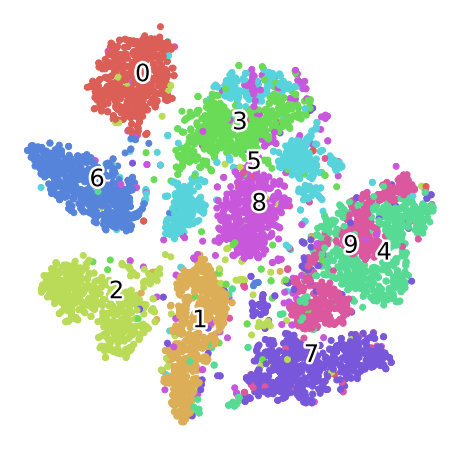

In [23]:
plot_scatter(tsne_results,df['label'])

#### Try with different parameter values and observe the different plots
Visualization for different values of perplexity say 5. Again calcluate the time taken & compare with earlier no preplixity parameter set.

In [24]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(perplexity=5)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 106.94136786460876 seconds


10


(<Figure size 576x576 with 1 Axes>,
 [Text(-58.707283, 57.00291, '0'),
  Text(81.558395, -4.4875746, '1'),
  Text(47.32832, 51.787724, '2'),
  Text(-4.0199685, 57.676975, '3'),
  Text(-17.56351, -76.017136, '4'),
  Text(-30.84402, 5.596185, '5'),
  Text(-75.85125, -5.7986255, '6'),
  Text(34.976555, -49.333744, '7'),
  Text(16.043255, 13.017525, '8'),
  Text(-3.3828068, -40.25603, '9')])

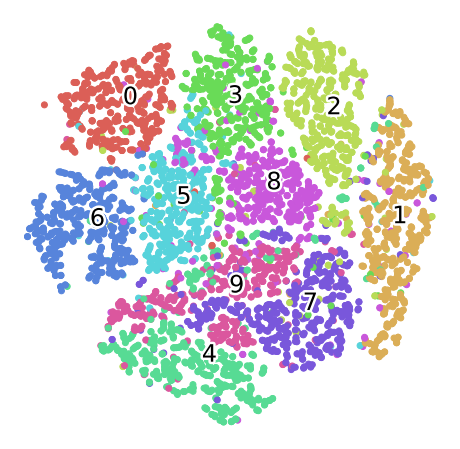

In [25]:
plot_scatter( tsne_results,df['label'])

In [26]:
import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(perplexity=40)
tsne_results = tsne.fit_transform(df.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 120.20106196403503 seconds


10


(<Figure size 576x576 with 1 Axes>,
 [Text(2.3507986, 69.925415, '0'),
  Text(-27.94009, -21.698517, '1'),
  Text(-52.594917, 3.251776, '2'),
  Text(19.694513, 29.57657, '3'),
  Text(34.52349, -33.757927, '4'),
  Text(27.578346, 14.245955, '5'),
  Text(-27.656532, 44.41181, '6'),
  Text(0.38301212, -57.96489, '7'),
  Text(11.282033, 2.890674, '8'),
  Text(24.485977, -30.516977, '9')])

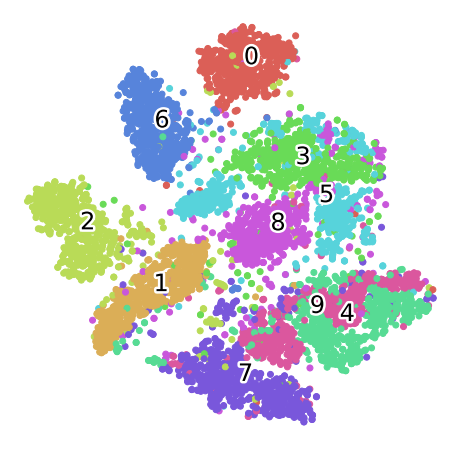

In [27]:
plot_scatter( tsne_results,df['label'])